In [1]:
import fitsio
%load_ext autoreload
%autoreload 2
import lusee
import healpy as hp
import matplotlib
font = {'size'   : 16}
matplotlib.rc('font', **font)
import os


In [2]:
sky = lusee.sky.FitsSky(os.environ['LUSEE_DRIVE_DIR']+"/Simulations/SkyModels/ULSA_32_ddi_smooth.fits",lmax=1)
skymeans = sky.maps.mean(axis=1)
freq = sky.freq

In [3]:
import astropy.units as u
T_NB= lusee.monosky.T_NB(freq)
T_C= lusee.monosky.T_C(freq)
TskyApprox = lusee.monosky.T_J

[]

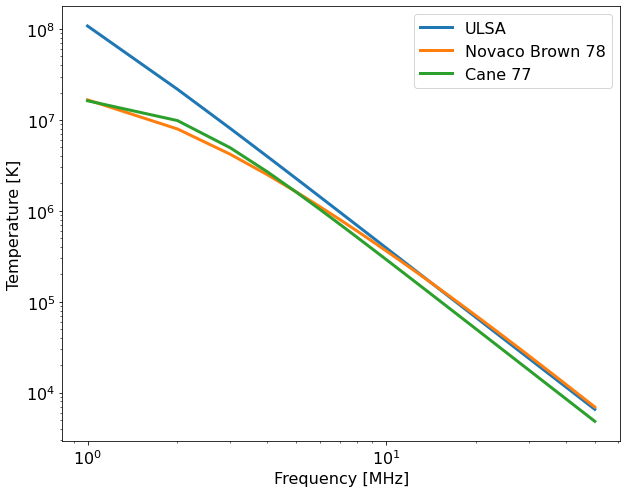

In [4]:
plt.figure(figsize=(10,8))
plt.plot(freq,skymeans,label='ULSA',lw=3)
plt.plot(freq,T_NB,label="Novaco Brown 78",lw=3)
plt.plot(freq,T_C,label="Cane 77",lw=3)
plt.plot()
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.legend()
plt.loglog()

In [5]:
data_lbl = lusee.LData('../simulation/output/hfss_lbl_1m_0523.fits')
data_bnl = lusee.LData('../simulation/output/feko_bnl_1m_0523.fits')
data_lbl2 = lusee.LData('../simulation/output/hfss_lbl_1m_0523.2port.fits')
data_bnl2 = lusee.LData('../simulation/output/feko_bnl_1m_0523.2port.fits')

data_lbl[:,'13I',:]==data_lbl[:,'02I',:]
data_bnl.data.shape
data_lbl[:,'02I',:]

array([[2432.34735902, 2450.43612536, 1800.86101407, ..., -146.5741667 ,
        -111.3480521 ,  -96.75654815],
       [1419.97392876, 1905.18533172, 1381.18001731, ..., -134.21038819,
        -106.48787136,  -94.12459056],
       [ 751.1563677 , 1326.0744929 , 1084.50302391, ...,  -92.71134383,
         -75.8402706 ,  -66.94640667],
       ...,
       [3541.98925689, 3567.60032265, 2776.19581704, ...,  -54.98597689,
         -46.50939793,  -38.97089654],
       [3009.89634745, 3246.19864246, 2433.26962239, ...,  -87.21532797,
         -66.08319194,  -54.56385743],
       [2658.32446457, 2593.24533868, 1933.86571668, ..., -137.77691118,
        -103.29379342,  -88.68021228]])

Text(0, 0.5, '$V_{ij}\\ [K]$')

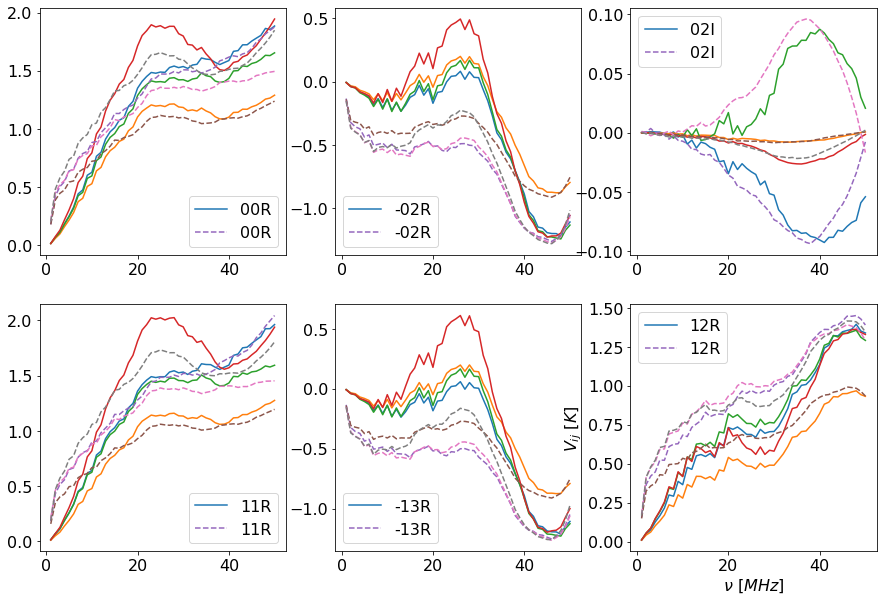

In [6]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2 ,3,figsize=(15,10))
we = (freq/10)**2.5/1e5
axl = [ax1,ax2,ax3,ax4,ax5,ax6]

for ii,comb in enumerate(['00R','-02R','02I','11R','-13R','12R']):
    for daydata,clr in [(data_lbl,'-'), (data_bnl,'--')]:
        xa = lambda x: x
        for day in np.arange(0,28,7):
            axl[ii].plot(freq,daydata[day,comb,:]*we,  clr,label = xa(comb))
            xa = lambda x: None
[ax.legend() for ax in axl]
plt.xlabel('$\\nu\ [MHz]$')
plt.ylabel('$V_{ij}\ [K]$')
#plt.semilogy()

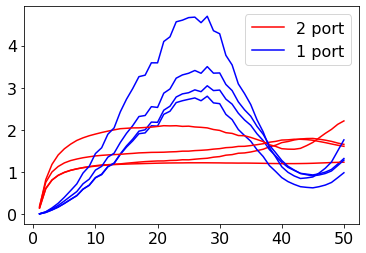

In [7]:
data1=data_lbl
data2=data_lbl2
for day in np.arange(0,28,7):
    NN = data1[day,'00R',:]
    SS = data1[day,'22R',:]
    NS = data1[day,'02R',:]
    plt.plot(freq,data2[day,'00R',:]*we,'r-')
    plt.plot(freq,((NN+SS-2*NS))*we,'b-')
    #plt.plot(freq,data2[day,'00R',:]/(NN+SS-2*NS) )
plt.plot([],[],'r-',label='2 port')
plt.plot([],[],'b-',label='1 port')
plt.legend()
    

In [38]:
data_lbl_75 = lusee.LData('../simulation/output/hfss_lbl_1m_75deg.fits')
data_lbl_45 = lusee.LData('../simulation/output/hfss_lbl_1m_45deg.fits')
data_lbl_15 = lusee.LData('../simulation/output/hfss_lbl_1m_15deg.fits')

data_lbl3_75 = lusee.LData('../simulation/output/hfss_lbl_3m_75deg.fits')
#data_lbl3_45 = lusee.LData('../simulation/output/hfss_lbl_3m_45deg.fits')
data_lbl3_15 = lusee.LData('../simulation/output/hfss_lbl_3m_15deg.fits')


data_lbl6_75 = lusee.LData('../simulation/output/hfss_lbl_6m_75deg.fits')
#data_lbl6_45 = lusee.LData('../simulation/output/hfss_lbl_6m_45deg.fits')
data_lbl6_15 = lusee.LData('../simulation/output/hfss_lbl_6m_15deg.fits')

cdata_lbl = lusee.LData('../simulation/output/hfss_lbl_1m_CMB.fits')
cdata_lbl3 = lusee.LData('../simulation/output/hfss_lbl_3m_CMB.fits')
cdata_lbl6 = lusee.LData('../simulation/output/hfss_lbl_6m_CMB.fits')

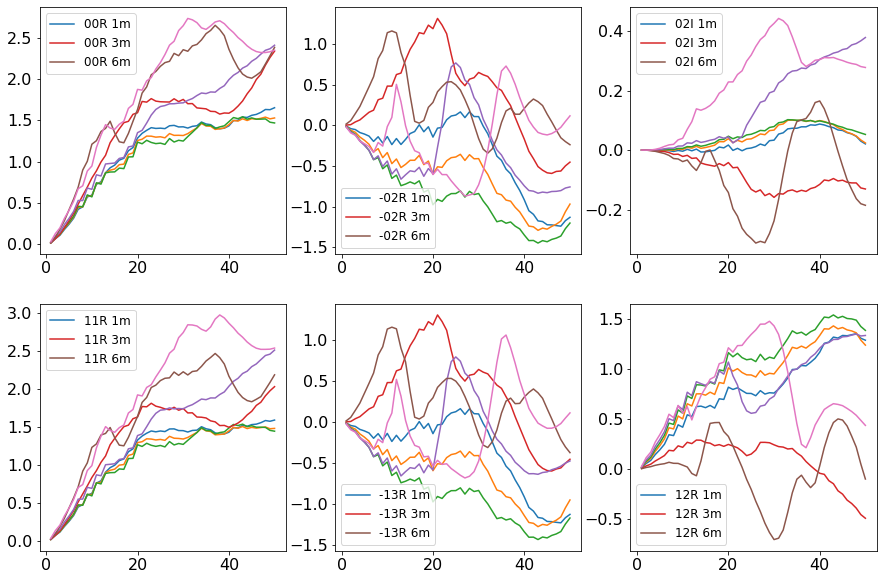

In [73]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2 ,3,figsize=(15,10))
we = (freq/10)**2.5/1e5
axl = [ax1,ax2,ax3,ax4,ax5,ax6]

for ii,comb in enumerate(['00R','-02R','02I','11R','-13R','12R']):
    for daydata, cdaydata, clr,lbl in [((data_lbl_75,data_lbl_45,data_lbl_15),cdata_lbl,'r','1m'), 
                                       ((data_lbl3_75,data_lbl3_15),cdata_lbl3,'g','3m'), 
                                       ((data_lbl6_75,data_lbl6_15),cdata_lbl6,'b','6m')]:
        xa = lambda x: x
        for daydata_ in daydata:
            axl[ii].plot(freq,daydata_[14,comb,:]*we,label = xa(comb + " " +lbl))
            #axl[ii].plot(freq,cdaydata_[14,comb,:]*we*1e3,clr+':')
            xa = lambda x: None
[ax.legend(fontsize=12) for ax in axl]


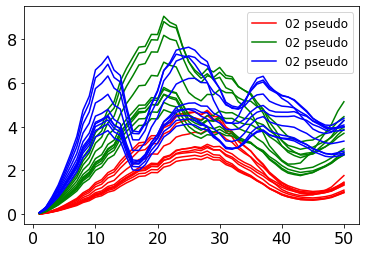

In [10]:
fig,ax=plt.subplots()
for daydata,clr,lbl in [(data_lbl,'r-','1m'), (data_lbl3,'g-','3m'), (data_lbl6,'b-','6m')]:
        xa = lambda x: x
        for day in np.arange(0,28,3):
            toplot = daydata[day,'00R',:]+daydata[day,'22R',:]-2*daydata[day,'02R',:]
            ax.plot(freq,toplot*we,  clr,label = xa("02 pseudo"))
            xa = lambda x: None
ax.legend(fontsize=12)



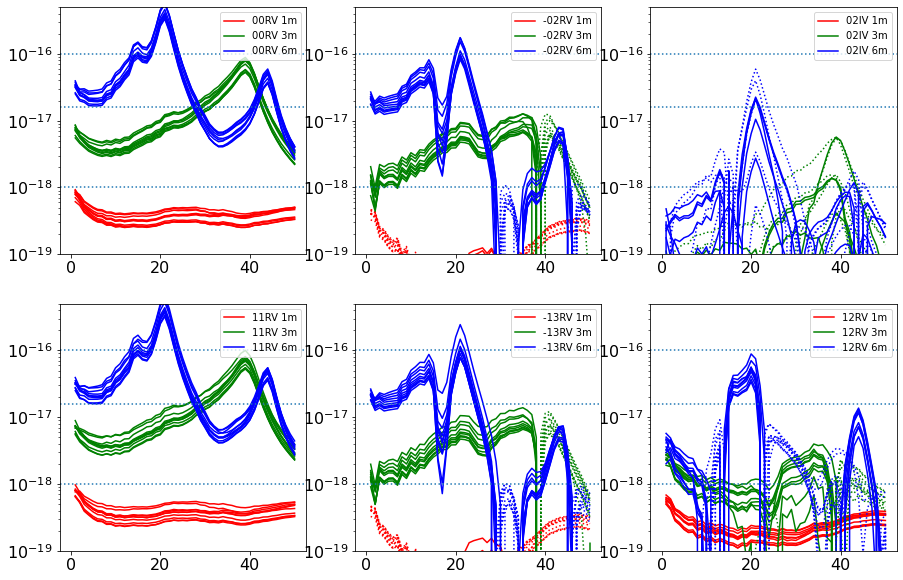

In [11]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2 ,3,figsize=(15,10))
we=1
axl = [ax1,ax2,ax3,ax4,ax5,ax6]

for ii,comb in enumerate(['00RV','-02RV','02IV','11RV','-13RV','12RV']):
    for daydata, cdaydata, clr,lbl in [(data_lbl,cdata_lbl,'r','1m'), 
                                       (data_lbl3,cdata_lbl3,'g','3m'), 
                                       (data_lbl6,cdata_lbl6,'b','6m')]:
        xa = lambda x: x
        for day in np.arange(0,28,3):
            axl[ii].plot(freq,daydata[day,comb,:]*we,  clr,label = xa(comb + " " +lbl))
            axl[ii].plot(freq,-daydata[day,comb,:]*we,  clr+':')
            #axl[ii].plot(freq,cdaydata[day,comb,:]*we,  clr+':')
            #axl[ii].plot(freq,-cdaydata[day,comb,:]*we,  clr+':')
            xa = lambda x: None
    
[ax.legend(fontsize=10) for ax in axl]
[ax.semilogy() for ax in axl]
[ax.axline([0,(1e-9**2)],[1,(1e-9**2)],ls=':') for ax in axl]
[ax.axline([0,(4e-9**2)],[1,(4e-9**2)],ls=':') for ax in axl]
[ax.axline([0,(10e-9**2)],[1,(10e-9**2)],ls=':') for ax in axl]
[ax.set_ylim(1e-19,5e-16) for ax in axl]
pass

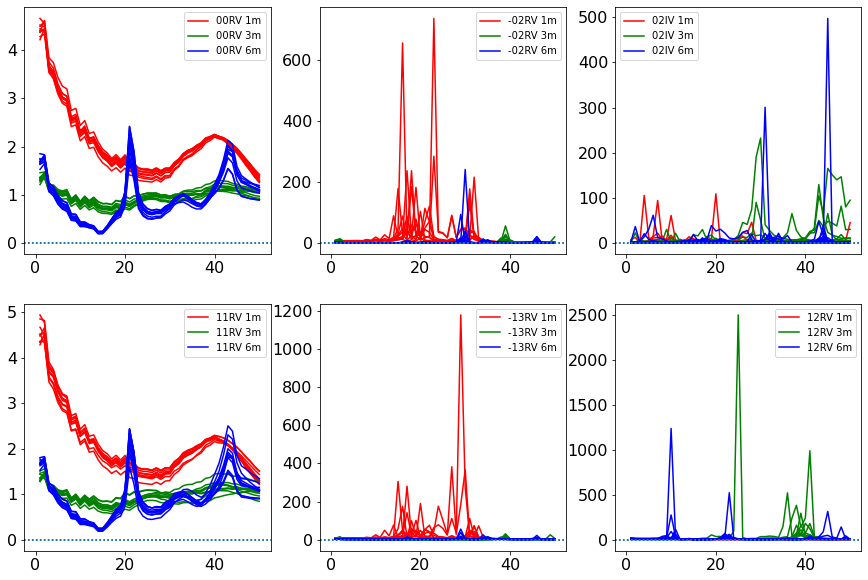

In [74]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2 ,3,figsize=(15,10))
we=1
axl = [ax1,ax2,ax3,ax4,ax5,ax6]

for ii,comb in enumerate(['00RV','-02RV','02IV','11RV','-13RV','12RV']):
    for daydata, cdaydata, clr,lbl in [((data_lbl_75,data_lbl_45,data_lbl_15),cdata_lbl,'r','1m'), 
                                       ((data_lbl3_75,data_lbl3_15),cdata_lbl3,'g','3m'), 
                                       ((data_lbl6_75,data_lbl6_15),cdata_lbl6,'b','6m')]:
        
 
        xa = lambda x: x
        #for daydata_ in daydata:
        #    axl[ii].plot(freq,daydata_[14,comb,:]*we,label = xa(comb + " " +lbl))
            #axl[ii].plot(freq,cdaydata_[14,comb,:]*we*1e3,clr+':')
        #    xa = lambda x: None
            
        #xa = lambda x: x
        for day in np.arange(0,28,3):
            toplot = daydata[-1][day,comb,:]/daydata[0][day,comb,:]
            axl[ii].plot(freq,np.abs(toplot),clr, label = xa(comb + " " +lbl))
        
        #axl[ii].plot(freq,-toplot, clr+':')
            #axl[ii].plot(freq,cdaydata[day,comb,:]*we,  clr+':')
            #axl[ii].plot(freq,-cdaydata[day,comb,:]*we,  clr+':')
            xa = lambda x: None
    
[ax.legend(fontsize=10) for ax in axl]
#[ax.semilogy() for ax in axl]
[ax.axline([0,(1e-9**2)],[1,(1e-9**2)],ls=':') for ax in axl]
[ax.axline([0,(4e-9**2)],[1,(4e-9**2)],ls=':') for ax in axl]
[ax.axline([0,(10e-9**2)],[1,(10e-9**2)],ls=':') for ax in axl]
#[ax.set_ylim(0,10) for ax in axl]
pass


(0.1, 1000.0)

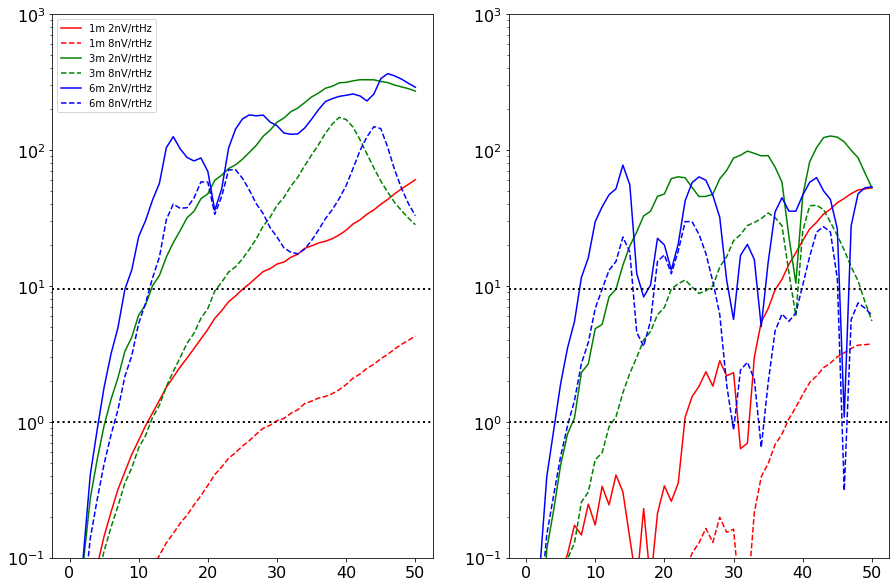

In [64]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,10))


for daydata, cdaydata, clr,lbl in [(data_lbl_15,cdata_lbl,'r','1m'), 
                                    (data_lbl3_15,cdata_lbl3,'g','3m'), 
                                    (data_lbl6_15,cdata_lbl6,'b','6m')]:

    daydata.setCfront(35)
    for noise,sty in zip([2e-9,8e-9],['-','--']):

        ivarA, ivarX = np.zeros(50),np.zeros(50)
        for day in np.arange(0,28):
            powerV00 = daydata[day,'00RV',:]
            powerV22 = daydata[day,'22RV',:]
            powerV02 = daydata[day,'02RV',:]
            powerV00tot = powerV00+noise**2
            ivarA += 1/powerV00tot**2*(1e6*1*24*3600)
            ivarX += 2/(powerV00tot**2+powerV02**2)*(1e6*1*24*3600)
        errA_K = np.sqrt(1/ivarA) #/ daydata.T2Vsq[0]        
        errX_K = np.sqrt(1/ivarX) #/ daydata.T2Vsq[0]                

        ax1.plot(freq,cdaydata[0,'00RV',:]/errA_K, clr+sty, label = f"{lbl} {int(noise*1e9)}nV/rtHz")
        ax2.plot(freq,np.abs(cdaydata[0,'02RV',:])/errX_K, clr+sty)
                
    #ax1.plot(freq,,clr+':',lw=2)
    #ax2.plot(freq,,clr+':',lw=2)
ax1.legend(fontsize=10) 
dax = (2.7/0.05) /2 /np.sqrt(8) #50 weaker / sqrt(4 antennas) / sqrt(16months/2months)
ax1.axline([0,1],[1,1],ls=':',color='k',lw=2) 
ax1.axline([0,dax],[1,dax],ls=':',color='k',lw=2) 
ax2.axline([0,1],[1,1],ls=':',color='k',lw=2) 
ax2.axline([0,dax],[1,dax],ls=':',color='k',lw=2) 

ax1.semilogy()
ax2.semilogy()
ax1.set_ylim(1e-1,1e3)
ax2.set_ylim(1e-1,1e3)
#[ax.set_ylim(1e-19,5e-16) for ax in axl]

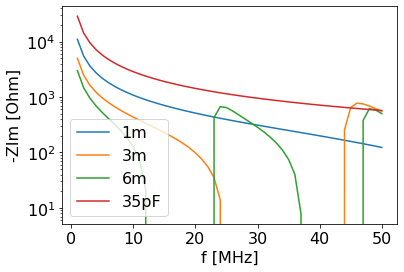

In [83]:
freq= data_lbl.freq

plt.plot(data_lbl.freq,-data_lbl.ZIm[0],label='1m')
plt.plot(data_lbl.freq,-data_lbl3.ZIm[0],label='3m')
plt.plot(data_lbl.freq,-data_lbl6.ZIm[0],label='6m')
plt.plot(data_lbl.freq,1/(35e-12*freq*1e6),label='35pF')
plt.semilogy()
plt.xlabel('f [MHz]')
plt.ylabel('-ZIm [Ohm]')
plt.legend()

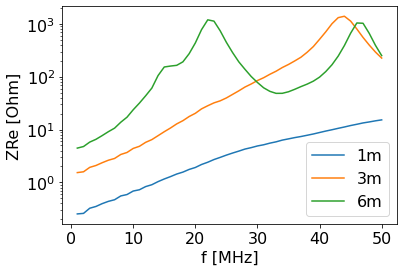

In [84]:
plt.plot(data_lbl.freq,data_lbl.ZRe[0],label='1m')
plt.plot(data_lbl.freq,data_lbl3.ZRe[0],label='3m')
plt.plot(data_lbl.freq,data_lbl6.ZRe[0],label='6m')
plt.semilogy()
plt.xlabel('f [MHz]')
plt.ylabel('ZRe [Ohm]')
plt.legend()

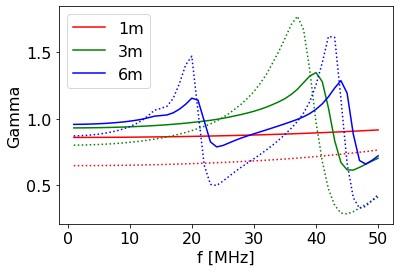

In [35]:

data_lbl.setCfront(15)
data_lbl3.setCfront(15)
data_lbl6.setCfront(15)
plt.plot(data_lbl.freq,data_lbl.Gamma[0],'r-',label='1m')
plt.plot(data_lbl.freq,data_lbl3.Gamma[0],'g-',label='3m')
plt.plot(data_lbl.freq,data_lbl6.Gamma[0],'b-',label='6m')
data_lbl.setCfront(50)
data_lbl3.setCfront(50)
data_lbl6.setCfront(50)
plt.plot(data_lbl.freq,data_lbl.Gamma[0],'r:')
plt.plot(data_lbl.freq,data_lbl3.Gamma[0],'g:')
plt.plot(data_lbl.freq,data_lbl6.Gamma[0],'b:')


plt.xlabel('f [MHz]')
plt.ylabel('Gamma')
plt.legend()

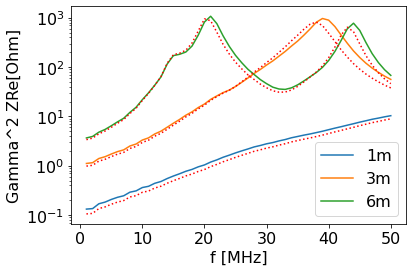

In [30]:
data_lbl.setCfront(35)
data_lbl3.setCfront(35)
data_lbl6.setCfront(35)
plt.plot(data_lbl.freq,data_lbl.Gamma[0]**2*data_lbl.ZRe[0],label='1m')
plt.plot(data_lbl.freq,data_lbl3.Gamma[0]**2*data_lbl3.ZRe[0],label='3m')
plt.plot(data_lbl.freq,data_lbl6.Gamma[0]**2*data_lbl6.ZRe[0],label='6m')

plt.xlabel('f [MHz]')
plt.ylabel('Gamma^2 ZRe[Ohm]')
plt.semilogy()
plt.legend()